In [1]:
import matplotlib
from jupyterthemes import jtplot
jtplot.style()
matplotlib.rcParams['figure.figsize'] = (12,10)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
la = np.linalg

from tqdm import tqdm_notebook
import psycopg2

from scipy.sparse import lil_matrix
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Softmax
from keras.utils import to_categorical

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
connection = psycopg2.connect(dbname="youfood", user="youfood", password="wizard11", host="localhost")
def sql(query):
    with connection as conn:
        with conn.cursor() as cur:
            cur.execute(query)
            return pd.DataFrame(cur.fetchall())

In [4]:
with connection as conn:
    with conn.cursor() as cur:
        cur.execute('SELECT MAX(rID) AS rcount, MAX(uID) AS ucount FROM "Restaurant", "User";')
        rcount, ucount = cur.fetchone()
        cur.execute(""" SELECT R1.rID AS r1ID,  R2.rID AS r2ID
                        FROM "Restaurant" AS R1, "Restaurant" AS R2, "Transaction" AS T1, "Transaction" AS T2
                        WHERE T1.useremail = T2.useremail
                              AND R1.name = T1.restaurant_name
                              AND R1.address = T1.restaurant_address
                              AND R2.name = T2.restaurant_name
                              AND R2.address = T2.restaurant_address;""")
        tuples = cur.fetchall()
    matrix = lil_matrix((rcount + 1, rcount + 1))
    for r1, r2 in tqdm_notebook(tuples):
        matrix[r1, r2] += 1
    del tuples
    for row in tqdm_notebook(range(rcount+1)):
        if matrix[row, :].sum():
            matrix[row, :] /= matrix[row, :].sum()
    matrix = matrix.todense()
pd.DataFrame(matrix)

HBox(children=(IntProgress(value=0, max=47959), HTML(value='')))

HBox(children=(IntProgress(value=0, max=364), HTML(value='')))

,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,0.102564,0.000000,0.000000,0.000000,0.000000,0.000000,0.017094,0.008547,0.008547,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,0.0,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,...,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,0.000000,0.026316,0.0,0.000000
4,0.0,0.000000,0.000000,0.000000,0.105691,0.000000,0.000000,0.000000,0.000000,0.008130,...,0.008130,0.000000,0.000000,0.008130,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.104046,0.005780,0.011561,0.005780,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005780,0.000000,0.000000,0.0,0.000000
7,0.0,0.009009,0.000000,0.000000,0.000000,0.000000,0.004505,0.112613,0.004505,0.009009,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
8,0.0,0.003195,0.000000,0.003195,0.000000,0.000000,0.006390,0.003195,0.115016,0.006390,...,0.000000,0.000000,0.006390,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
9,0.0,0.003021,0.000000,0.000000,0.003021,0.000000,0.003021,0.006042,0.006042,0.108761,...,0.000000,0.000000,0.000000,0.003021,0.000000,0.006042,0.000000,0.000000,0.0,0.000000


In [5]:
x = Input(shape=(rcount+1,))
layer1 = Dense(5, use_bias=False)(x)
layer2 = Dense(rcount+1, use_bias=False)(layer1)
y = Softmax()(layer2)
model = Model(inputs=x, outputs=y)
model.compile(optimizer='adagrad', loss='kullback_leibler_divergence')

In [6]:
seqs = list(range(rcount+1))
#seqs = seqs.reshape((1,rcount+1))
#print(seqs.shape)
print(matrix.shape)
model.fit(to_categorical(seqs), matrix, epochs = 200, verbose=False)
vecs = model.layers[1].get_weights()[0]

(364, 364)


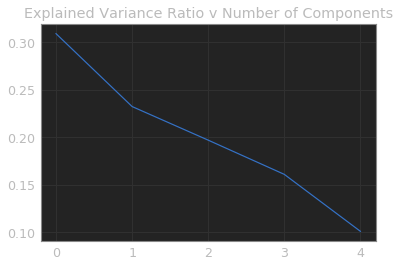

Reconstruction power 1.0000000149011612


In [7]:
exp_reduce = PCA(n_components=vecs.shape[1])
exp_reduce.fit(vecs)
evr = exp_reduce.explained_variance_ratio_
plt.title("Explained Variance Ratio v Number of Components")
plt.plot(range(len(evr)), evr)
plt.show()
print(f"Reconstruction power {sum(evr)}")

SVD/PCA Done
TSNE Done


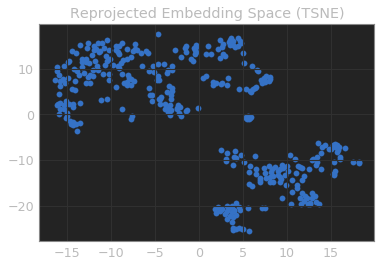

In [8]:
reduce1 = PCA(n_components=2)
reduce2 = TSNE(n_components=2)
v1 = reduce1.fit_transform(vecs)
print("SVD/PCA Done")
v2 = reduce2.fit_transform(vecs)
print("TSNE Done")
plt.title("Reprojected Embedding Space (TSNE)")
plt.scatter(v2[:,0], v2[:,1])
plt.show()
# OH MY GOD ITS FULL OF CLUSTERS

In [9]:
def tuples():
    for rID, c1, c2, c3, c4, c5 in pd.DataFrame(vecs).itertuples():
        if rID:
            yield f"({rID}, {c1}, {c2}, {c3}, {c4}, {c5})"
pd.DataFrame(vecs)

,0,1,2,3,4
0,0.001930,0.000020,-0.031014,-0.024957,0.007229
1,0.027784,-0.181680,-0.277820,0.363436,-0.381769
2,0.449598,-0.193004,-0.475580,0.453162,0.456158
3,0.340969,-0.396802,-0.379877,-0.415644,-0.356028
4,0.299363,-0.414670,-0.217329,0.000023,-0.410915
5,0.480517,0.408687,-0.210788,0.496529,-0.395089
6,-0.254499,0.031578,-0.426840,0.355648,-0.312757
7,-0.367116,-0.418000,-0.193387,0.438460,-0.338047
8,-0.348047,-0.284554,-0.442437,0.416833,-0.404943
9,-0.053647,-0.297838,-0.286976,0.237743,-0.407025


In [10]:
values = ", ".join(tuples())
sql(f"""DELETE FROM "RestaurantEmbeddings";
        INSERT INTO "RestaurantEmbeddings"(rID, c1, c2, c3, c4, c5) VALUES {values};
        SELECT * FROM "RestaurantEmbeddings";""")
print("Updated embeddings!")

Updated embeddings!
